In [2]:
import requests
import xlwt
from bs4 import BeautifulSoup
import time
import random
import pandas as pd
import re


class MySpider:
    start_url = 'https://movie.douban.com/subject/33464863/comments?'

    def __init__(self, headers=None):
        if headers is None:
            self._headers = {
                'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.138 Safari/537.36'
            }
        else:
            self._headers = headers
        self._param = {
            'start': 0,
            'limit': 20,
            'sort': 'new_score',
            'status': 'P',
        }
        self.writer = self.save_data()
        next(self.writer)

    def spider(self, url):
        response = requests.get(url, headers=self._headers, params=self.params)
        response.raise_for_status()
        return response

    def get_data(self, response):
        soup = BeautifulSoup(response.text, 'html.parser')
        comments = soup.find_all("div", class_='comment-item')
        for comment in comments:
            vote = comment.find('span', class_='votes').get_text().strip()
            user_name = comment.find("span", class_='comment-info').a.get_text().strip()
            spans = comment.find('span', class_='comment-info').find_all('span')
            star = " ".join(spans[1]["class"])
            the_time = spans[-1]['title'].strip()
            sort = comment.find('span', class_='short').get_text().strip().replace("\n", "")
            data = (vote, user_name, star, the_time, sort)
            print(data)
            self.writer.send(data)
            
    def set_parameter(self, key, value):
        self._param[key] = value

    @property
    def params(self):
        return self._param

    def save_data(self):
        workbook = xlwt.Workbook()
        sheet = workbook.add_sheet("sheet")
        row = 0
        while True:
            try:
                data = yield
            except StopIteration:
                break
            except GeneratorExit:
                break
            else:
                for col, val in enumerate(data):
                    sheet.write(row, col, label=val)
                row += 1
        workbook.save("豆瓣.xls")
        
    def run_spider(self, start=0):
        while True:
            self.set_parameter('start', start)
            try:
                response = self.spider(self.start_url)
            except Exception as e:
                print(e)
                self.writer.close()
                break
            else:
                self.get_data(response)
                start += 20
                time.sleep(random.random() * random.randint(1, 4))
        print("爬虫结束")


def data_handle():
    file = r"豆瓣.xls"
    new_data = pd.read_excel(file, names=("angree", "title", "star_text", "the_date", "comment"))

    def filter(x):
        result = re.search(r"\d+", x)
        if not result:
            value = 0
        else:
            value = result.group()
        return value
    new_data['star'] = new_data['star_text'].apply(lambda x: filter(x))
    save_file = r'新豆瓣数据.xlsx'
    new_data.to_excel(save_file, index=False)




In [3]:
# 机智医生生活 短评
spider = MySpider()
spider.run_spider()

('2381', '此木为柴', 'allstar50 rating', '2020-03-13 10:55:35', '品质保证:中国追孔笙，韩国看申源浩')
('1363', '久石让', 'allstar50 rating', '2020-03-12 20:20:33', '这部片子在这个时间点播出，对于韩国和中国来说，都别有一番滋味在心头')
('841', '세넓또많', 'allstar40 rating', '2020-03-13 01:13:20', '哈哈哈哈我要站郑少女跟柳演锡这对！！！（站错（摔———')
('1196', '吴奕意', 'allstar50 rating', '2020-03-12 21:46:07', '第一集就神仙阵容公布大半，机智的请回答宇宙！德善爸跟金社长居然是亲兄弟哈哈哈哈，曹政奭的出场笑死我了，无处不在的小细节和彩蛋，别拍三季，拍三十季好吗？')
('941', 'Vivi', 'allstar50 rating', '2020-03-12 00:05:09', '不要随便站cp，往往磕的爽的，最后都不能成（狗善党的执念...‖04.17果然我没错！！！一开始就站的颂华翼俊，双向暗恋真的，求求你们了，一定要在一起啊啊，张冬天医生也冲冲冲！')
('330', 'Creep_', 'allstar30 rating', '2020-03-13 02:40:50', '太温吞，目前想照顾的面有点大，但专业性又不太够，医疗剧不应该只为展现生离死别的画面而存在。')
('693', '阿五', 'allstar50 rating', '2020-03-12 23:29:42', '有人情味的作品，在我看来这部剧没有主角，因为所有出场的角色都是主人公，他们有喜有悲鲜活且饱满让人难忘，这也是李有静远强于其他南韩编剧的最牛逼的地方。')
('641', 'Justina', 'allstar50 rating', '2020-03-14 14:41:38', '世事难料，没想到有一天 成东日和七封成了亲兄弟。郑少女的脸太紧致了，皮包骨了。看起来朋友圈中年纪最小。')
('523', '马丁路人金', 'allstar50 rating', '2020-03-12 20:15:25', '2020年3月12日，韩国中央防疫对策本部

In [7]:
data_handle()
df = pd.read_excel("新豆瓣数据.xlsx")
df

,angree,title,star_text,the_date,comment,star
0,1363,久石让,allstar50 rating,2020-03-12 20:20:33,这部片子在这个时间点播出，对于韩国和中国来说，都别有一番滋味在心头,50
1,841,세넓또많,allstar40 rating,2020-03-13 01:13:20,哈哈哈哈我要站郑少女跟柳演锡这对！！！（站错（摔———,40
2,1196,吴奕意,allstar50 rating,2020-03-12 21:46:07,第一集就神仙阵容公布大半，机智的请回答宇宙！德善爸跟金社长居然是亲兄弟哈哈哈哈，曹政奭的出场...,50
3,941,Vivi,allstar50 rating,2020-03-12 00:05:09,不要随便站cp，往往磕的爽的，最后都不能成（狗善党的执念...‖04.17果然我没错！！！一...,50
4,330,Creep_,allstar30 rating,2020-03-13 02:40:50,太温吞，目前想照顾的面有点大，但专业性又不太够，医疗剧不应该只为展现生离死别的画面而存在。,30
...,...,...,...,...,...,...
214,3,走走与树,allstar50 rating,2020-04-19 16:30:25,太爱琐碎的日常戏了。看之前：这次绝对不猜老公了郑少女就是我心中的老公。看之后：群像戏诶，怎么...,50
215,1,吾不知,allstar50 rating,2020-05-08 21:05:32,郑少女可以,50
216,5,遥不可及,allstar30 rating,2020-03-28 10:45:03,没有那么好，医院不是这个样子的,30
217,2,Monsoon,allstar50 rating,2020-05-18 01:10:39,我太爱翼俊这个沙雕了！！,50


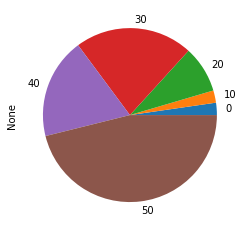

In [12]:
group_df = df.groupby(by='star')
size = group_df.size()
sum_ = size.sum()
size = (size / sum_) * 100
size.plot.pie()

In [20]:
import jieba
from pyecharts import options as opts
from pyecharts.charts import WordCloud
from pyecharts.globals import SymbolType
from collections import Counter

data = Counter([w for w in jieba.cut(''.join(df.comment)) if w and len(w) > 1])
data = data.most_common(100)
c = (
    WordCloud()
    .add("", data, word_size_range=[20, 100], shape=SymbolType.DIAMOND)
    .set_global_opts(title_opts=opts.TitleOpts(title="机智医生生活 短评"))
    
)
c.render_notebook()

l:\python\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)
